# FINAL PROJECT 1: REGRESSION
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science
## Our Members:

## A. Introduction
### Abstract
Di era digital ini, perkembangan teknologi saat ini sangat pesat hingga dapat mengubah gaya hidup masyarakat umum. Hal ini dapat berdampak baik dalam dalam banyak hal, misalnya mobilitas perjalanan. Meningkatnya akses internet melalui smartphone di kalangan masyarakat dunia mengundang hadirnya **transportasi online**. Pada tahun 2018, New York telah menunjukkan peningkatan yang kuat dalam aktivitas bisnis, sementara juga memimpin skor global dalam _human capital_. Hal ini berarti, New York menjadi salah satu kota paling berpengaruh di dunia (Kearney, Global Cities Report 2018).

Di New York, ride-hailing yang paling populer adalah **Uber dan Lyft**. Secara umum, tidak terdapat banyak perbedaan dari segi biaya dan waktu antara moda ride-hailing dengan taksi. Keunggulan moda ride-hailing dibandingkan dengan taksi adalah dalam aspek kenyamanan. Calon penumpang tidak harus menunggu di pinggir jalan, namun dapat menggunakan aplikasi pada smartphone untuk memanggil pengemudi.

Untuk membantu masyarakat New York City dalam memilih transportasi online yang terbaik dengan harga murah berdasarkan berbagai macam pertimbangan, seperti jarak, pemilihan tipe kendaraan, dll, maka akan dilakukan analisis serta perbandingan antara **Linear Regression dengan Polynomial Regression** dengan melihat nilai kebaikan model (R^2, MAE, RMSE)

### Data
Dataset yang digunakan yaitu Uber vs Lyft Dataset New York, USA yang berisi record data perjalanan taksi online Uber dan Lyft di New York, USA. Dataset ini memiliki 57 atribut dengan record sebanyak 693071 data. 

### Objectives
Objective yang ingin dicapai dalam analisis ini, yaitu:
Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi tarif harga transportasi online.
Menemukan model terbaik untuk digunakan dalam memprediksi tarif harga transportasi online.
Memberikan insight yang dapat membantu pihak penumpang maupun pihak transportasi online dalam bentuk charts.

## B. Import Libraries

In [2]:
# Untuk menonaktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

from dython.nominal import associations

# Library For DataFrame
import pandas as pd
import numpy as np

# Library for Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(["seaborn"])
import seaborn as sns
import plotly.express as px

# Library for Analysis
import scipy
import sympy as sp
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud,STOPWORDS

## C. Data Loading

### Import Dataset

In [21]:
# Membaca data dan menampilkan data
df = pd.read_csv("rideshare_kaggle.csv")
pd.set_option("display.max.columns", None)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [112]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Data tersebut memiliki jumlah baris",len(df), "dan kolom berjumlah",len(df.columns))

Data tersebut memiliki jumlah baris 693071 dan kolom berjumlah 57


### Type of Data

In [113]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Statistical Data

In [114]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

### Check Missing Values

In [6]:
# Mengecek missing values dan hanya menampilkan column yang memiliki missing values dengan jumlah missing valuesnya
df.isnull().sum()[df.isnull().sum() > 0]

price    55095
dtype: int64

### Check Duplicated Data

In [7]:
# Mengecek data duplikat
df.duplicated().sum()

0

### Unique Values

In [8]:
# Melihat nilai unique pada data
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

## D. Data Cleaning

### Handling Missing Values

In [9]:
# Melihat persentase missing values dari keseluruhan data
print(round((55095/len(df)*100), 2),'%')

7.95 %


Karena hanya 7.95 % missing values dari keseluruhan data, maka akan dilakukan dropna agar mendapatkan akurasi yang lebih baik nantinya.

In [22]:
# Menghapus baris yang terdapat missing values
df_clean = df.dropna()

# Melihat total baris dan kolom pada df_clean
df_clean.shape

(637976, 57)

### Drop Unnecessary Columns

In [11]:
# Mengecek nunique masing-masing columns, untuk columns yang memiliki semua data yang sama atau semua data yang berbeda 
print(df_clean.nunique()[df_clean.nunique() == 1])
print(df_clean.nunique()[df_clean.nunique() == len(df_clean)])

timezone    1
dtype: int64
id    637976
dtype: int64


In [117]:
# Data pada column "name" dan "product_id" sama, sehingga salah satu column akan di drop
df_clean[['name','product_id']].value_counts()

name          product_id                          
Black SUV     6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
UberXL        6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
WAV           9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
Black         6c84fd89-3f11-4782-9b50-97c468b19529    55095
UberX         55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
UberPool      997acbb5-e102-41e1-b155-9df7de0a73f2    55091
Lux           lyft_premier                            51235
Lux Black     lyft_lux                                51235
Lux Black XL  lyft_luxsuv                             51235
Lyft          lyft                                    51235
Lyft XL       lyft_plus                               51235
Shared        lyft_line                               51233
Name: count, dtype: int64

In [118]:
# Kemudian akan dilakukan drop columns pada columns tersebut ("timezone","id","product_id"). Serta columns yang tidak dibutuhkan seperti "timestamp" dan "datetime" (karena sudah ada column "day", "month"). 
df = df_clean.drop(["timezone","id","timestamp","datetime","product_id"],axis=1)

In [119]:
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [121]:
# Melihat total baris dan kolom pada df
df.shape

(637976, 52)

### Label Encode for Columns with object dtype

In [15]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap column
label_encoder = preprocessing.LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor1
df_category = df.select_dtypes(include='object')
df_encode = df.copy()

for column in df_category.columns:
    df_encode[column] = label_encoder.fit_transform(df_category[column])

### Select Columns with Highest Correlation 

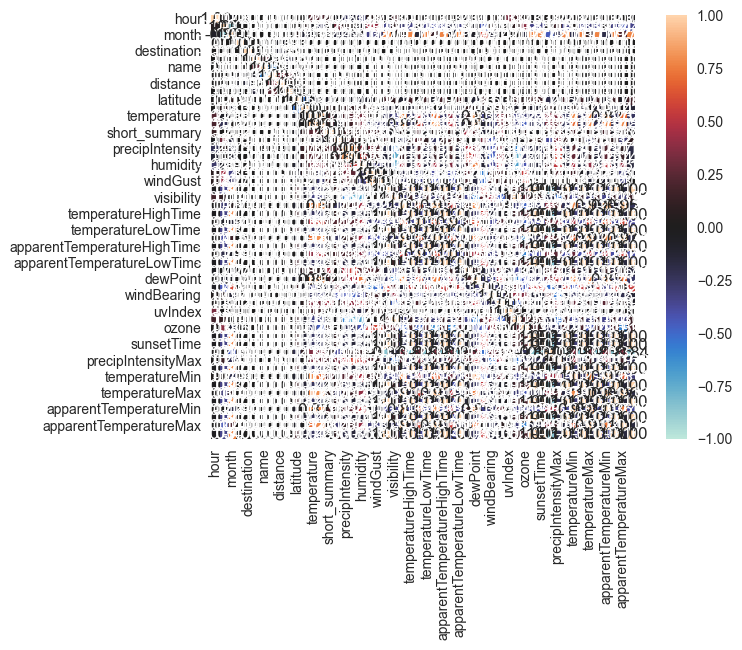

In [149]:
# Untuk mengetahui korelasi masing-masing columns
corr = associations(df_encode)

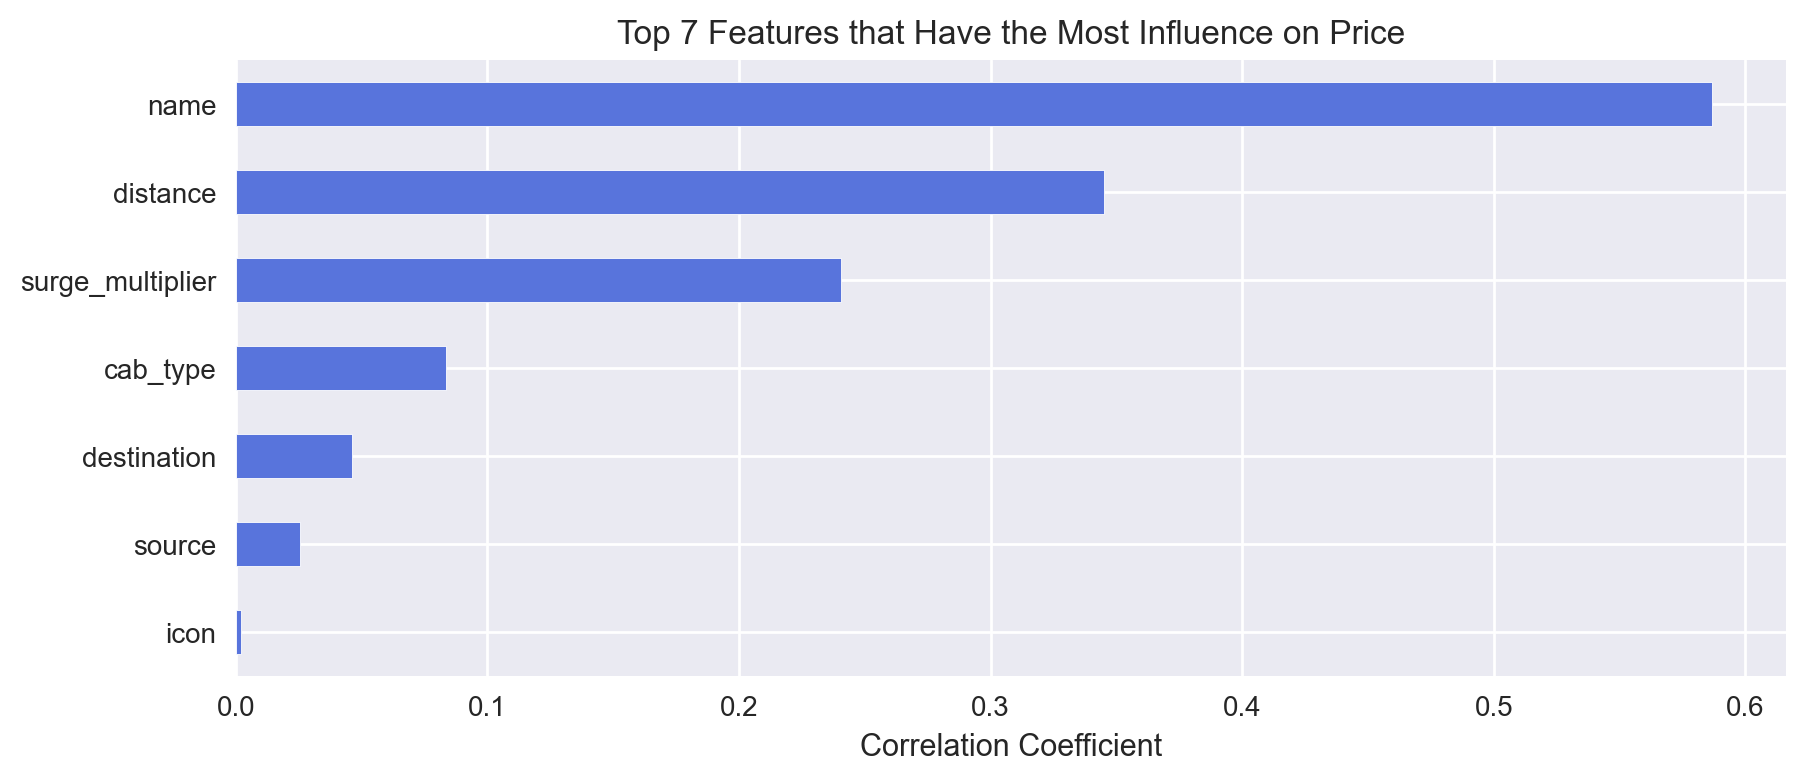

In [150]:
# Menampilkan 7 columns dengan korelasi tertinggi
top_7_corr = abs(corr["corr"][["price"]].drop("price")).sort_values("price",ascending=False).head(7)
fig = plt.figure(figsize=(10,4),dpi=200)
top_7_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.title("Top 7 Features that Have the Most Influence on Price")
plt.xlabel("Correlation Coefficient")
plt.show()

### Heatmap Correlation

In [151]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(15,10)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="PuBu", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

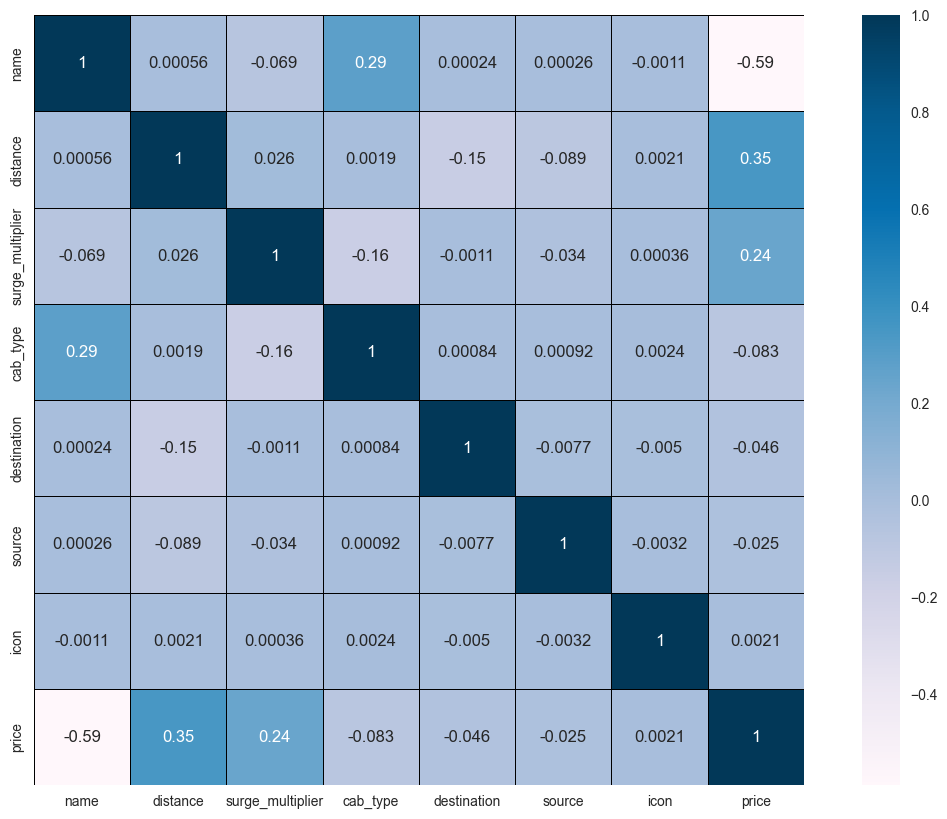

In [148]:
heatmap = ['name', 'distance', 'surge_multiplier', 'cab_type', 'destination','source', 'icon','price']
heat_map(df_encode,heatmap)

In [5]:
# Data hanya berisi 7 column dengan korelasi terhadap price yang tertinggi.
df = df[['name', 'distance', 'surge_multiplier', 'cab_type', 'destination','source', 'icon','price']]

### Removing Outliers

In [23]:
price_q1 = df["price"].describe().loc["25%"]
price_q3 = df["price"].describe().loc["75%"]
price_iqr = price_q3 - price_q1

price_lower_limit = price_q1 - (1.5 * price_iqr)
price_upper_limit = price_q3 + (1.5 * price_iqr)

df = df[(df["price"] >= price_lower_limit) & (df["price"] <= price_upper_limit)].copy()

## Exploration Data Analysis

### Which One is More Popular? Uber or Lyft? 

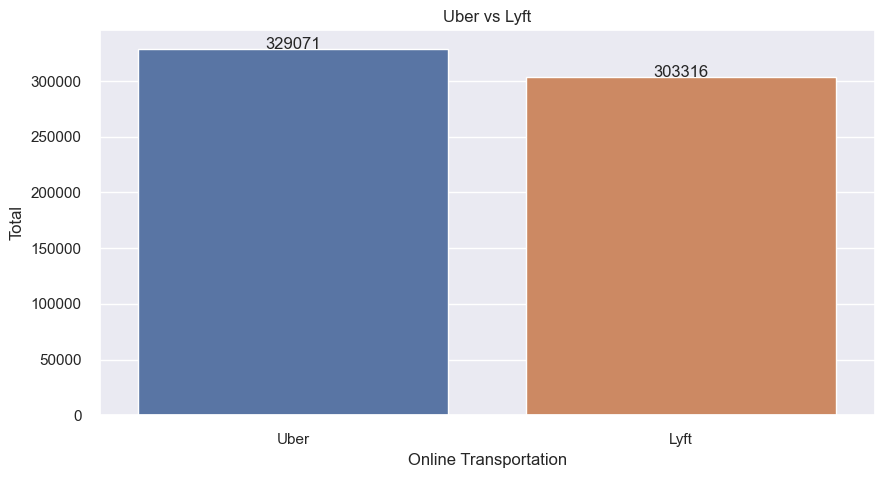

In [74]:
# Membuat variabel df_transport_name berisi total data dari kolom transport_name
df_transport_name = df['cab_type'].value_counts()
df_transport_name = pd.DataFrame(df_transport_name).reset_index()
x = df_transport_name['cab_type']
y = df_transport_name['count']

# Memvisualisasikan kolom transport_name dalam bentuk bar charts
ax = sns.barplot(x=x, y=y)
plt.xlabel('Online Transportation')
plt.ylabel('Total')
plt.title('Uber vs Lyft')
for i, v in enumerate(y):
   ax.text(i, v + 0.2, str(v), ha='center')
plt.show()

Dari barchart tersebut dapat dilihat bahwa Transportasi Online yang lebih populer adalah Uber dengan 329071 total pemesanan, sedangkan total pemesanan Lyft sebanyak 303316.

### Percentage of Each Transportation Type

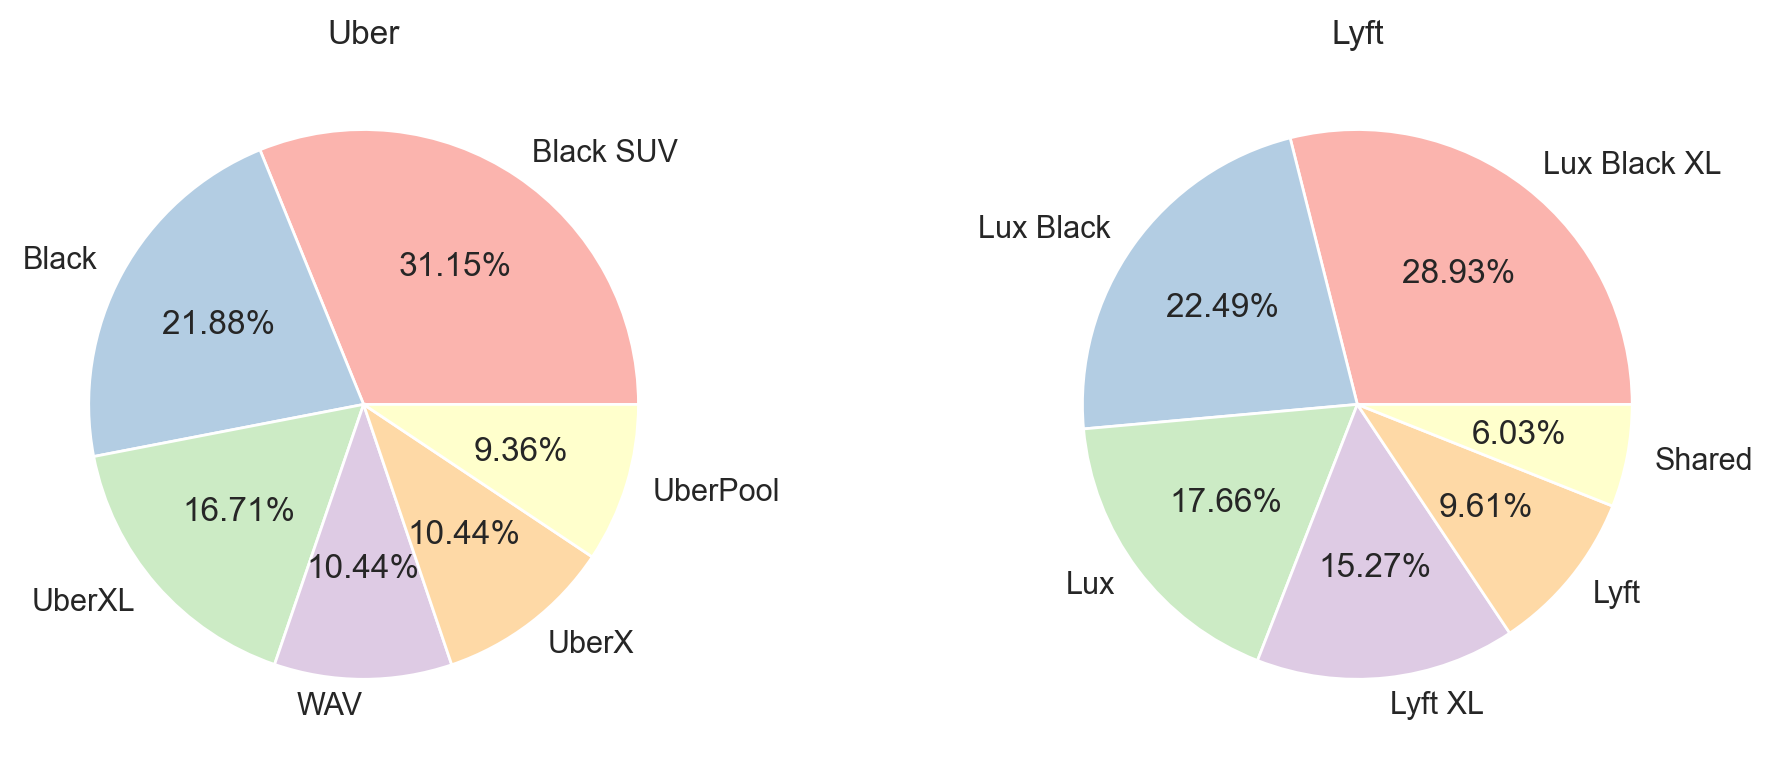

In [75]:
uber_name = df[df["cab_type"] == "Uber"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)
lyft_name = df[df["cab_type"] == "Lyft"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)

fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=1,ncols=2)

ax[0].pie(uber_name["price"],labels=uber_name.index,autopct="%.2f%%",colors=sns.color_palette("Pastel1"))
ax[0].set_title("Uber")

ax[1].pie(lyft_name["price"],labels=lyft_name.index,autopct="%.2f%%",colors=sns.color_palette("Pastel1"))
ax[1].set_title("Lyft")

plt.tight_layout()
plt.show()

Dari piechart di atas dapat dilihat bahwa tipe Black SUV paling banyak dipesan di Uber dengan 31.15%, tipe yang paling sedikit dipesan di Uber yakni UberPool dengan persentase 9.36%. Pada Lyft paling banyak dipesan adalah Lux Black XL 28.93% dan Shared yang paling sedikit dipesan di Lyft sebesar 6.03%.

### Place with Most Pick-ups (Source and Destination)

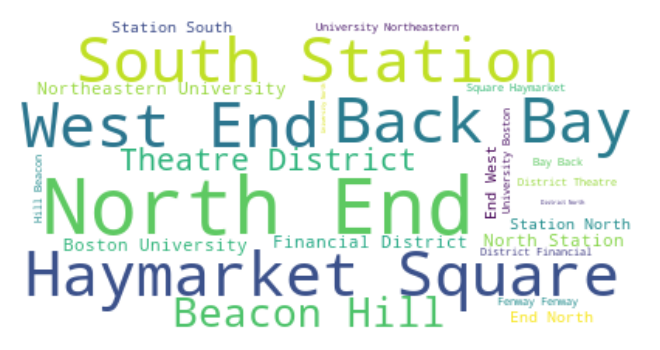

In [77]:
stopwords = set(STOPWORDS)
plt.figure(figsize=(4,4),dpi=200)
source_wordcloud = WordCloud(background_color='white',
                             stopwords=stopwords).generate(' '.join(df['source']))
plt.imshow(source_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Dapat dilihat dari wordcloud di atas bahwa North End merupakan titik penjemputan terbanyak, karena kata tersebut paling besar di wordcloud tersebut.

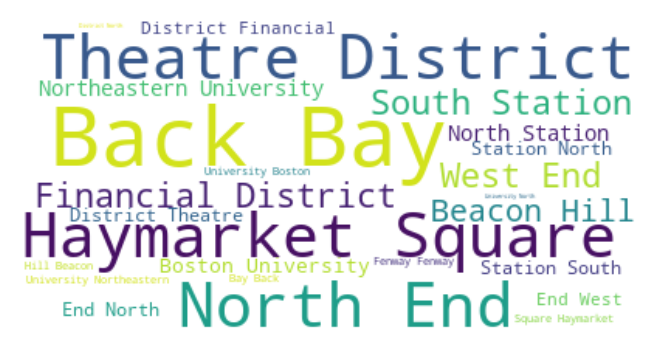

In [80]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

plt.figure(figsize=(4,4),dpi=200)
destination_wordcloud = WordCloud(background_color='white',
                             stopwords=stopwords).generate(' '.join(df['destination']))
plt.imshow(destination_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Dapat dilihat dari wordcloud di atas bahwa Back Bay merupakan titik pengantaran terbanyak, karena kata tersebut paling besar di wordcloud tersebut.

### How Distances Affect Price

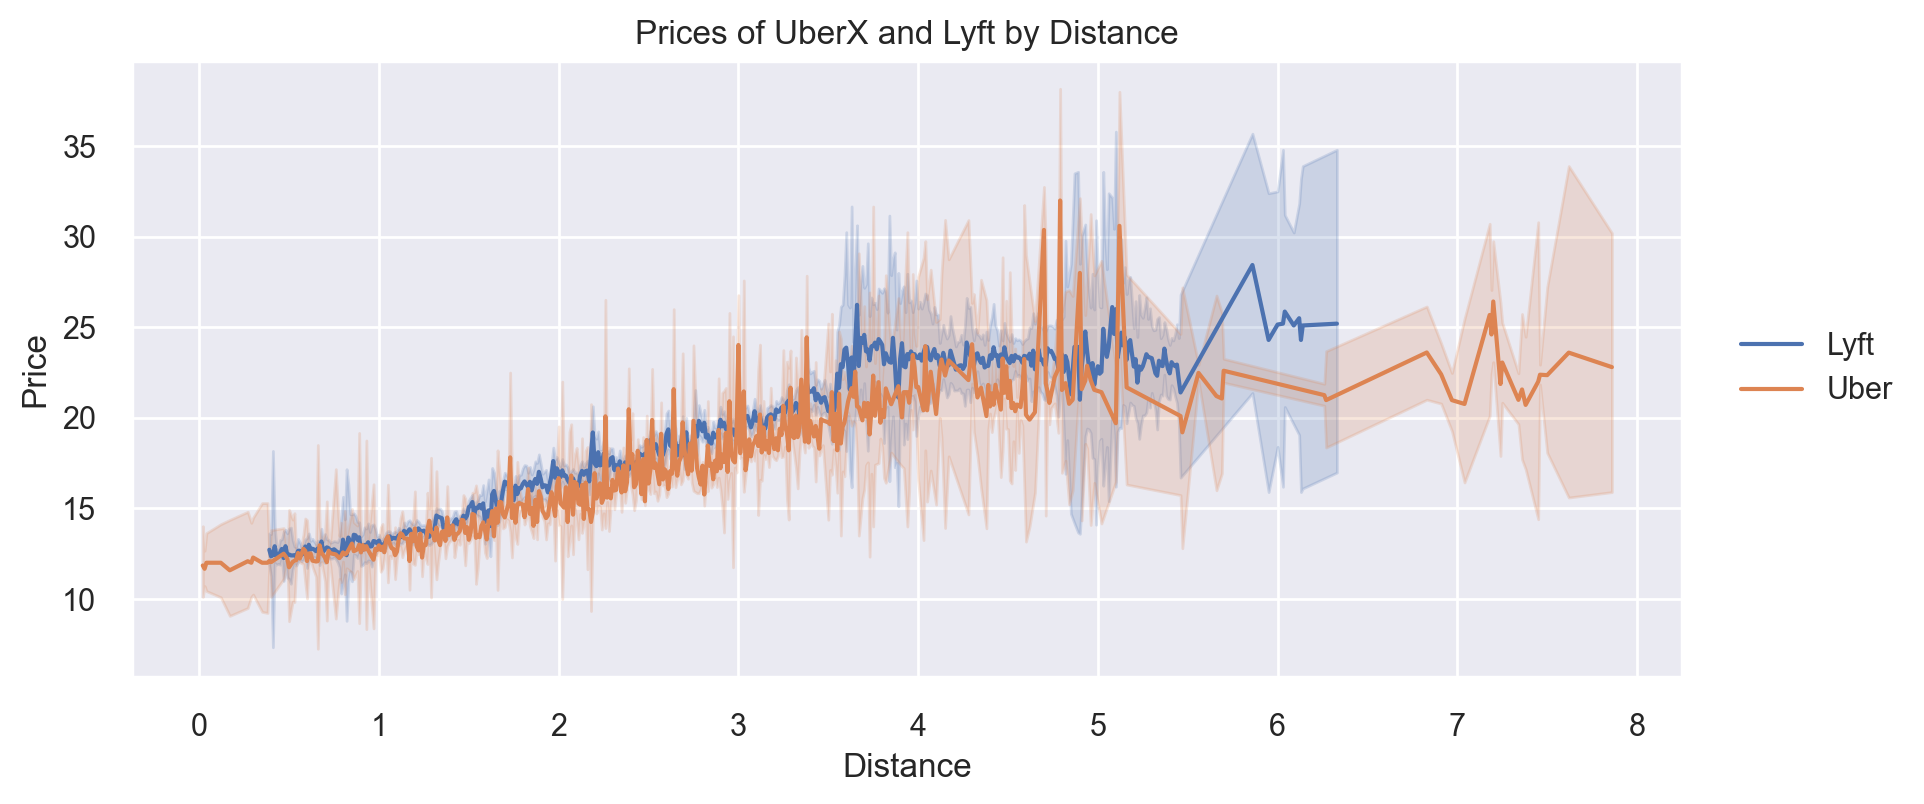

In [42]:
plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=df,x="distance",y="price",hue="cab_type")
plt.title("Prices of UberX and Lyft by Distance")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()

Berdasarkan grafik diatas dapat dilihat bahwa semakin besar jarak yang ditempuh oleh Uber dan Lyft, maka semakin besar pula tarif perjalanannya. Lyft memiliki tarif lebih tinggi dibandingkan Uber walaupun jarak yang ditempuh tidak terlalu besar daripada Uber. Artinya, ada korelasi antara jarak yang ditempuh dengan tarif perjalanan.

### Do Weathers Influence Surge Multiplier Price?

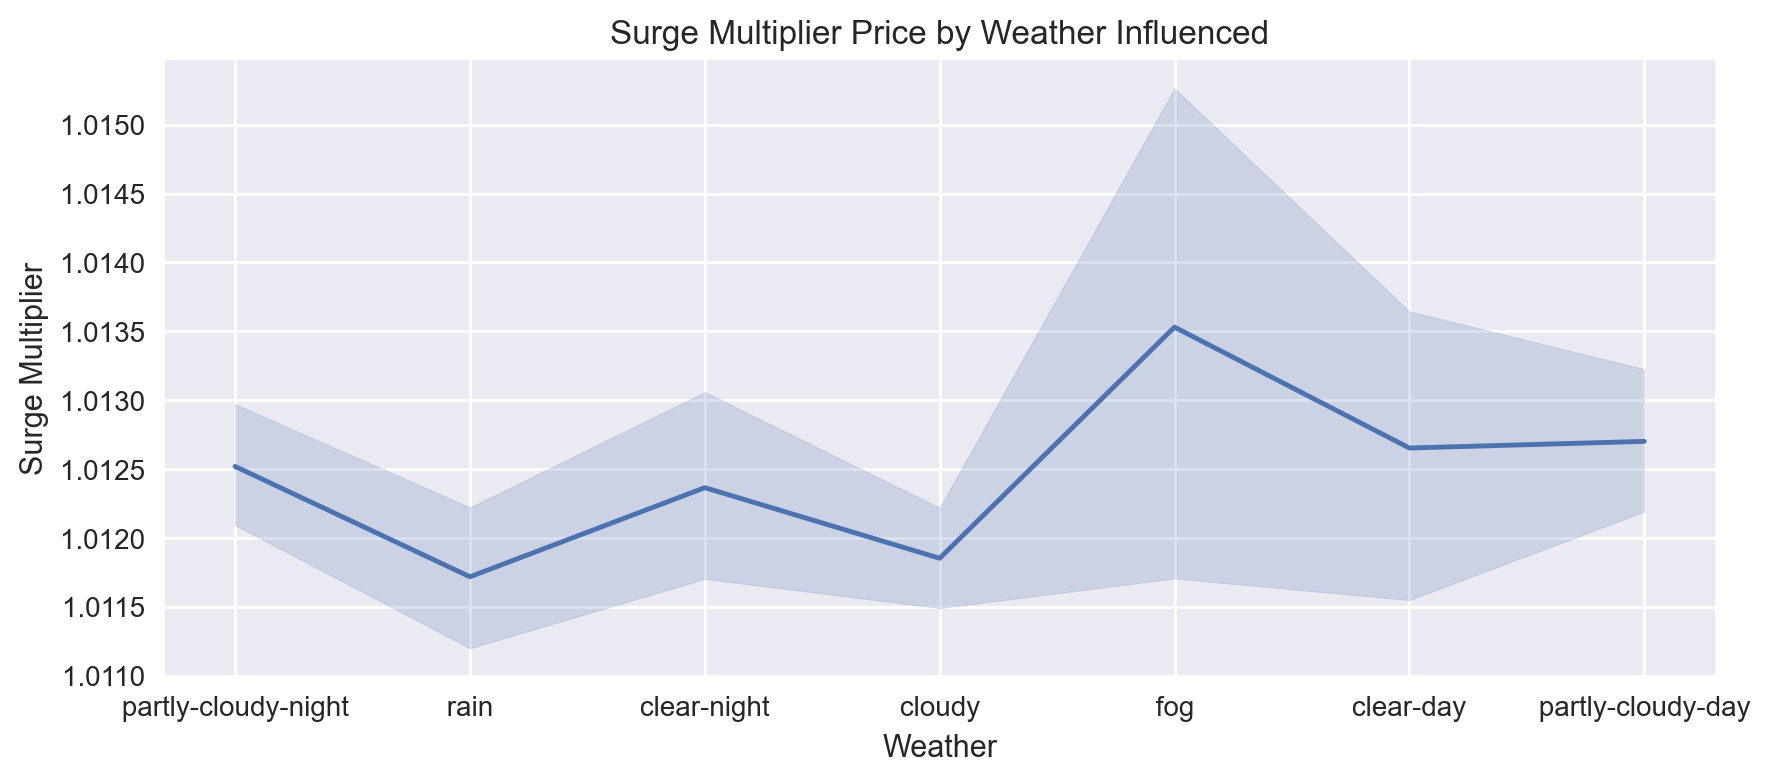

In [83]:
plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=df,x="icon",y="surge_multiplier")
plt.title("Surge Multiplier Price by Weather Influenced")
plt.xlabel("Weather")
plt.ylabel("Surge Multiplier")
plt.show()

Price kuat dipengaruhi oleh Surge Multiplier atau Pengganda Tarif. Maka dari itu akan dilihat faktor kenaikan pengganda tarif, misalnya cuaca. Berdasarkan line chart di atas dapat disimpulkan bahwa cuaca mempengaruhi pengganda tarif dengan pada cuaca berkabut (fog) memiliki surge multiplier tertinggi.

In [21]:
surge_price = df.pivot_table(index='surge_multiplier', columns=['name', 'cab_type'], values='price', fill_value=0)
surge_price.index = surge_price.index.map(int)
surge_price

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
cab_type,Uber,Uber,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Uber,Uber,Uber,Uber
surge_multiplier,,,,,,,,,,,,
1.00,20.487195,29.859943,17.113552,22.178923,30.684030,9.281424,14.735208,6.029893,8.7525,9.764453,15.642382,9.764398
1.25,0.000000,0.000000,21.495038,27.825400,36.443516,11.509698,18.482634,0.000000,0.0000,0.000000,0.000000,0.000000
1.50,0.000000,0.000000,26.178536,32.132503,39.268000,13.731984,22.579467,0.000000,0.0000,0.000000,0.000000,0.000000
1.75,0.000000,0.000000,29.231626,34.272727,0.000000,15.655992,26.056936,0.000000,0.0000,0.000000,0.000000,0.000000
2.00,0.000000,0.000000,31.262438,36.006276,0.000000,17.331658,28.118734,0.000000,0.0000,0.000000,0.000000,0.000000
2.50,0.000000,0.000000,0.000000,0.000000,0.000000,22.519481,33.327586,0.000000,0.0000,0.000000,0.000000,0.000000
3.00,0.000000,0.000000,0.000000,0.000000,0.000000,29.750000,41.000000,0.000000,0.0000,0.000000,0.000000,0.000000


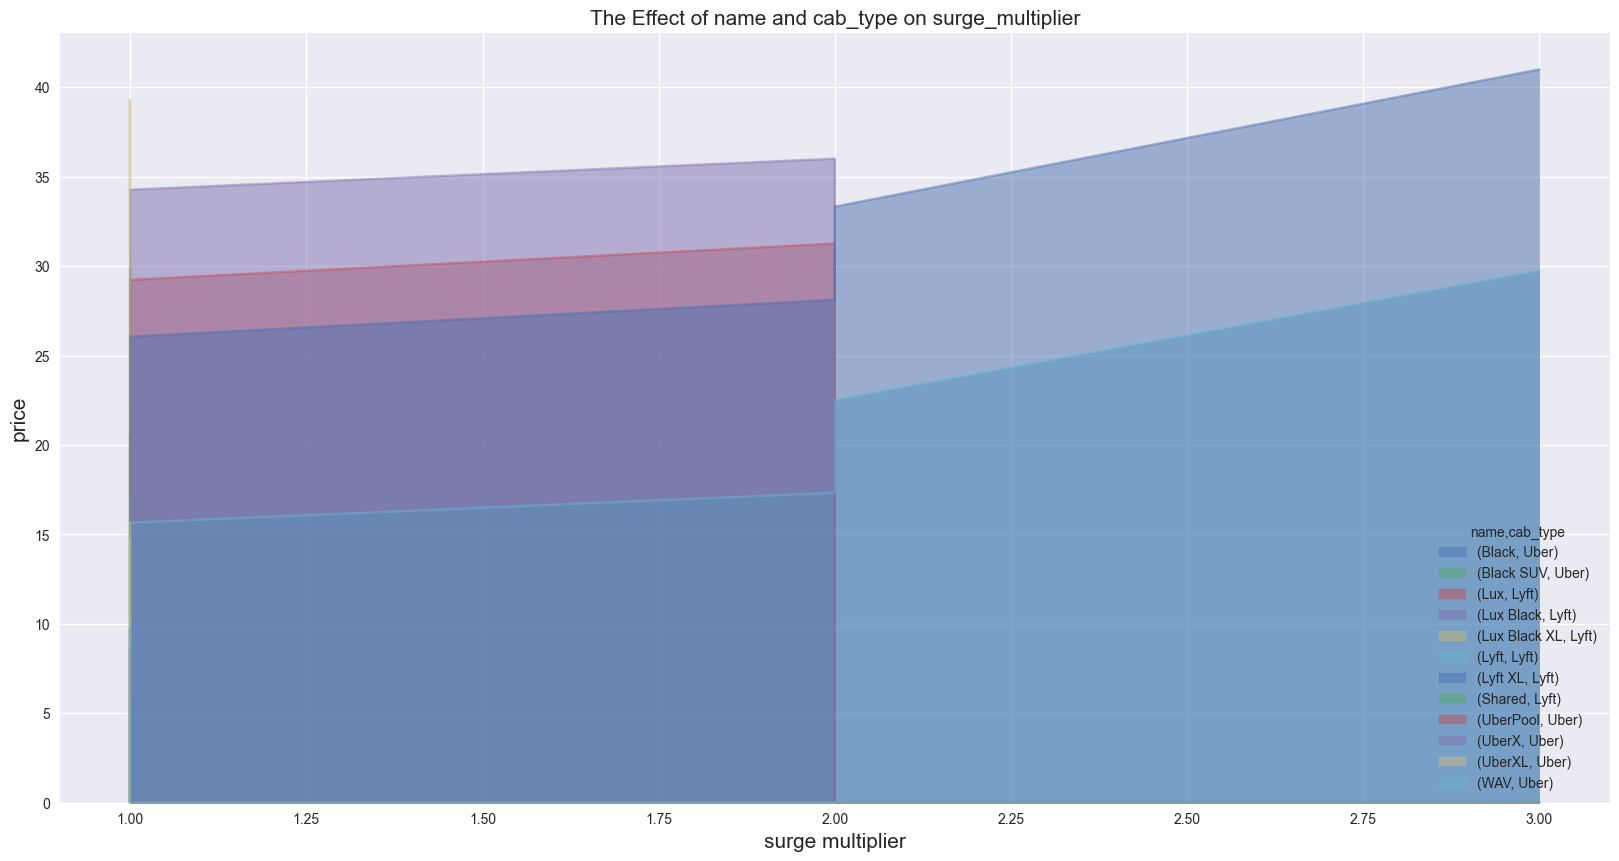

In [23]:
surge_price.plot(kind='area',
                stacked=False,
                figsize=(20,10)
                )
plt.title('The Effect of name and cab_type on surge_multiplier', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.xlabel('surge multiplier', fontsize=15)

plt.show()

Berdasarkan visualisasi data diatas, maka dapat disimpulkan bahwa:

Jenis mobil dan tipe taksi yang dipesan berpengaruh kepada pengganda tarif, sehingga harga yang didapatkan bisa lebih mahal.
Tipe uber hanya mengalami pengganda tarif sampai 1.0 saja.
Pengganda tarif terbesar adalah jenis Lyft XL dengan harga 41 USD pada pengganda ke 3.00 disusul jenis Lux Black XL dengan harga sebesar 39.268 USD pada pengganda 1.50.

df

In [24]:
df = df[['name', 'distance', 'surge_multiplier', 'cab_type', 'destination','source', 'icon','price']]
df

,name,distance,surge_multiplier,cab_type,destination,source,icon,price
0,Shared,0.44,1.0,Lyft,North Station,Haymarket Square,partly-cloudy-night,5.0
1,Lux,0.44,1.0,Lyft,North Station,Haymarket Square,rain,11.0
2,Lyft,0.44,1.0,Lyft,North Station,Haymarket Square,clear-night,7.0
3,Lux Black XL,0.44,1.0,Lyft,North Station,Haymarket Square,clear-night,26.0
4,Lyft XL,0.44,1.0,Lyft,North Station,Haymarket Square,partly-cloudy-night,9.0
...,...,...,...,...,...,...,...,...
693065,WAV,1.00,1.0,Uber,North End,West End,partly-cloudy-night,9.5
693066,UberXL,1.00,1.0,Uber,North End,West End,partly-cloudy-night,13.0
693067,UberX,1.00,1.0,Uber,North End,West End,partly-cloudy-night,9.5
693069,Black SUV,1.00,1.0,Uber,North End,West End,partly-cloudy-night,27.0


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df.copy().drop("price",axis=1).apply(le.fit_transform)
y = df.copy()["price"]

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1221)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 442670
Testing dataset		: 189717


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

base_model = LinearRegression()
base_model.fit(scaled_X_train,y_train)

LinearRegression()

In [29]:
base_pred = base_model.predict(scaled_X_test)

In [30]:
from sklearn.metrics import r2_score

r2_score(y_test,base_pred)

0.5006207928252261

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_2_X = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

In [32]:
poly_2_X_train,poly_2_X_test,y_train,y_test = train_test_split(poly_2_X,y,test_size=0.3,random_state=1221)

scaled_poly_2_X_train = scaler.fit_transform(poly_2_X_train)
scaled_poly_2_X_test = scaler.transform(poly_2_X_test)

In [33]:
poly_2_model = LinearRegression()
poly_2_model.fit(scaled_poly_2_X_train,y_train)

LinearRegression()

In [34]:
poly_2_pred = poly_2_model.predict(scaled_poly_2_X_test)

In [35]:
r2_score(y_test,poly_2_pred)

0.5435136153621729

In [36]:
poly_3_X = PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

In [37]:
poly_3_X_train,poly_3_X_test,y_train,y_test = train_test_split(poly_3_X,y,test_size=0.3,random_state=1221)

scaled_poly_3_X_train = scaler.fit_transform(poly_3_X_train)
scaled_poly_3_X_test = scaler.transform(poly_3_X_test)

In [38]:
poly_3_model = LinearRegression()
poly_3_model.fit(scaled_poly_3_X_train,y_train)

LinearRegression()

In [39]:
poly_3_pred = poly_3_model.predict(scaled_poly_3_X_test)

In [40]:
r2_score(y_test,poly_3_pred)

0.702545700246166